# Optimization for Business Application

Optimization techniques are widely used in various business applications to improve efficiency, reduce costs, maximize profits, and make better decisions. Some common business applications of optimization techniques include:

1. <span style='color:blue'>Supply Chain Management:</span> Optimizing inventory levels, production schedules, and distribution networks to minimize costs and improve customer service.

2. <span style='color:blue'>Resource Allocation:</span> Optimizing the allocation of resources such as manpower, machinery, and materials to maximize productivity and minimize waste.

3. <span style='color:blue'>Transportation and Logistics:</span> Optimizing vehicle routes and schedules to minimize fuel consumption, reduce transportation costs, and improve delivery times.

4. <span style='color:blue'>Financial Planning:</span> Optimizing investment portfolios, risk management strategies, and financial models to maximize returns and minimize risks.

5. <span style='color:blue'>Marketing and Pricing:</span> Optimizing marketing campaigns, pricing strategies, and product placements to maximize revenue and market share.

6. <span style='color:blue'>Production Planning:</span> Optimizing production processes, scheduling, and capacity utilization to meet demand while minimizing costs.

7. <span style='color:blue'>Scheduling and Timetabling:</span> Optimizing employee schedules, project timelines, and event schedules to improve efficiency and reduce conflicts.

### General Form

\begin{align}
    \mbox{Min} ~ &F(x_1, x_2, ..., x_n) \\
    \mbox{s.t. } &g(x_1, x_2, ..., x_n) \geq 0 \\
    &x_1, x_2, ..., x_n \geq 0,\\
    &x_1, x_2, ..., x_n \in R
\end{align}

<span style='color:blue'>F:</span> is the objective function. <br>
<span style='color:blue'>g:</span> is the constraint function. <br>
<span style='color:blue'>$x_1, x_2, ..., x_n$:</span> are the variables. <br>


# Operation Management: Resource Allocation
A company manufactures two products, Product A and Product B. Each product requires two types of raw materials, Material X and Material Y. The company has 500 units of Material X and 800 units of Material Y available. Product A requires 3 units of Material X and 4 units of Material Y, while Product B requires 5 units of Material X and 2 units of Material Y. The company wants to maximize its profit from selling these products, where the profit from Product A is \\$10 per unit and the profit from Product B is $8 per unit. How many units of each product should the company produce to maximize its profit, given the constraints on available raw materials?

### Identify the Decision Variables
Let $x$ be the number of units of Product A to produce, and let $y$ be the number of units of Product B to produce.

### Formulate the Objective Function
$Maximize ~ Z = 10x+8y$


### The Constraints
Material X Constraint: This constraint ensures that the total units of Material X used in producing both Product A and Product B do not exceed the available 500 units.<br>
$ 3x + 5y \leq 500$

Material Y Constraint: Similarly, this constraint ensures that the total units of Material Y used in producing both Product A and Product B do not exceed the available 800 units.<br> 
$ 4x + 2y \leq 800$

None Negative Constraint:<br>
$ x, y \geq 0$ <br>


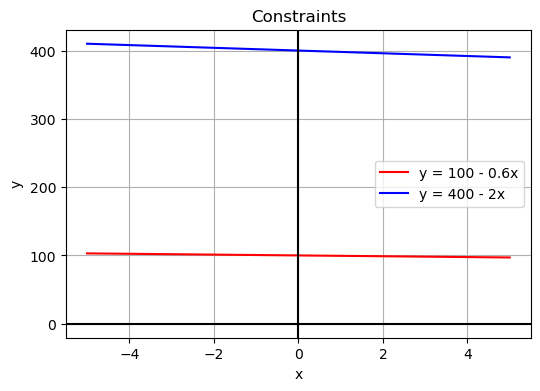

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the equations (y = mx + b)
def equation1(x):
    return 100 - 3/5 * x
def equation2(x):
    return 400- 2 * x

# Generate x values
x = np.linspace(-5, 5, 100)
frames = np.linspace(1, 4000, 100)

# Plot the equations
plt.figure(figsize=(6, 4))
plt.plot(x, equation1(x), color = 'r', label = 'y = 100 - 0.6x')
plt.plot(x, equation2(x), color = 'b', label = 'y = 400 - 2x')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Constraints')
plt.legend()

# Show plot
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

### Solving

In [2]:
from pulp import *

# Create a LP minimization problem
prob = LpProblem("Maximize_Profit", LpMaximize)

# Define decision variables
A = LpVariable("Product_A", lowBound=0, cat='Integer')
B = LpVariable("Product_B", lowBound=0, cat='Integer')

# Define objective function
prob += 10 * A + 8 * B, "Total Profit"

# Define constraints
prob += 3 * A + 5 * B <= 500, "Material_X_Constraint"
prob += 4 * A + 2 * B <= 800, "Material_Y_Constraint"

# Solve the problem
prob.solve()

# Print the results
print("Optimal Production Quantity:")
print("Product A:", value(A))
print("Product B:", value(B))
print("Total Profit: $", value(prob.objective))

Optimal Production Quantity:
Product A: 166.0
Product B: 0.0
Total Profit: $ 1660.0


### What decision can you make?

##### Answer: 

### Finance Application: Portfolio Optimization

Portfolio optimization is the process of selecting the best portfolio of assets, considering various factors such as risk, return, and correlation between assets. The goal of portfolio optimization is to construct a portfolio that maximizes return for a given level of risk or minimizes risk for a given level of return.

In finance, portfolio optimization is a crucial tool for investors and fund managers to make informed decisions about asset allocation. Modern portfolio theory, developed by Harry Markowitz, forms the basis of portfolio optimization. Markowitz's theory suggests that investors should not only consider the expected return of an investment but also its risk (or volatility) and its correlation with other assets in the portfolio.

### Common Portfolio Models
1. Mean-Variance Optimization
2. Optimization of Value at Risk
3. Optimization of Conditional Value at Risk

## Portfolio allocation vector

In this example we show how to do portfolio optimization using CVXPY.
We begin with the basic definitions.
In portfolio optimization we have some amount of money to invest in any of $n$ different assets. 
We choose what fraction $w_i$ of our money to invest in each asset $i$, $i=1, \ldots, n$.

We call $w\in {\bf R}^n$ the *portfolio allocation vector*.
We of course have the constraint that ${\mathbf 1}^T w =1$.
The allocation $w_i<0$ means a *short position* in asset $i$, or that we borrow shares to sell now that we must replace later.
The allocation $w \geq 0$ is a *long only* portfolio.
The quantity below is known as *leverage*.

$$
\|w \|_1 = {\mathbf 1}^T w_+ + {\mathbf 1}^T w_-
$$

## Asset returns

We will only model investments held for one period. The initial prices are $p_i > 0$. The end of period prices are $p_i^+ >0$. The asset (fractional) returns are $r_i = (p_i^+-p_i)/p_i$. The porfolio (fractional) return is $R = r^Tw$.

A common model is that $r$ is a random variable with mean ${\bf E}r = \mu$ and covariance ${\bf E{(r-\mu)(r-\mu)^T}} = \Sigma$.
It follows that $R$ is a random variable with ${\bf E}R = \mu^T w$ and ${\bf var}(R) = w^T\Sigma w$.
${\bf E}R$ is the (mean) *return* of the portfolio. ${\bf var}(R)$ is the *risk* of the portfolio.
(Risk is also sometimes given as ${\bf std}(R) = \sqrt{{\bf var}(R)}$.)

Portfolio optimization has two competing objectives: high return and low risk.

## Classical (Markowitz) portfolio optimization

Classical (Markowitz) portfolio optimization solves the optimization problem

$$
\begin{array}{ll} \mbox{maximize} & \mu^T w - \gamma w^T\Sigma w\\
\mbox{subject to} & {\bf 1}^T w = 1, \quad w \in {\cal W},
\end{array}
$$

where $w \in {\bf R}^n$ is the optimization variable, $\cal W$ is a set of allowed portfolios (e.g., ${\cal W} = {\bf R}_+^n$ for a long only portfolio, no short portfolio in this example), and $\gamma >0$ is the *risk aversion parameter*. $\mu$ is the expected return. 

The objective $\mu^Tw - \gamma w^T\Sigma w$ is the *risk-adjusted return*. Varying $\gamma$ gives the optimal *risk-return trade-off*.
We can get the same risk-return trade-off by fixing return and minimizing risk.

In [8]:
import yfinance as yf
import pandas as pd
from pulp import *

tickers = ['AAPL', "NVDA", "COKE", 'T', 'F', 'TM', 'TSLA']

stock_data = yf.download(tickers, start = "2023-01-01", end = "2024-01-31")
stock_data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed


Price            Close                                               \
Ticker            AAPL        COKE          F       NVDA          T   
Date                                                                  
2023-01-03  123.632538  460.162201   9.566103  14.303279  16.157591   
2023-01-04  124.907700  469.178894   9.836380  14.736923  16.502468   
2023-01-05  123.583099  467.026062  10.032941  14.253322  16.562820   
2023-01-06  128.130219  482.694397  10.303216  14.846836  16.838724   
2023-01-09  128.654129  473.532806  10.393309  15.615206  16.653301   
...                ...         ...        ...        ...        ...   
2024-01-24  193.339218  851.692505   9.982285  61.338966  15.597909   
2024-01-25  193.011169  834.458801  10.262840  61.593868  16.065472   
2024-01-26  191.271606  837.170471  10.308091  61.008091  16.168335   
2024-01-29  190.585739  853.033325  10.452892  62.441547  16.130928   
2024-01-30  186.917770  862.896851  10.661044  62.750431  16.392765   

Price                                     High                         ...  \
Ticker              TM        TSLA        AAPL        COKE          F  ...   
Date                                                                   ...   
2023-01-03  130.913406  108.099998  129.395526  499.511426   9.762667  ...   
2023-01-04  129.881470  113.639999  127.181268  470.472511   9.893711  ...   
2023-01-05  128.300430  110.339996  126.301493  481.120742  10.139413  ...   
2023-01-06  131.566650  113.059998  128.792516  486.700755  10.311406  ...   
2023-01-09  132.484970  119.769997  131.876670  488.660430  10.589873  ...   
...                ...         ...         ...         ...        ...  ...   
2024-01-24  195.633194  207.830002  195.208003  855.288573  10.362391  ...   
2024-01-25  194.502579  182.630005  195.098642  859.926887  10.280940  ...   
2024-01-26  193.040588  183.250000  193.597637  840.537762  10.407642  ...   
2024-01-29  196.549362  190.929993  191.052935  853.033325  10.461943  ...   
2024-01-30  196.734558  191.589996  190.655340  865.727783  10.742495  ...   

Price            Open                             Volume                   \
Ticker              T          TM        TSLA       AAPL   COKE         F   
Date                                                                        
2023-01-03  15.959286  130.610461  118.470001  112117500  60800  45809000   
2023-01-04  16.269676  130.847135  109.110001   89113600  47400  53429700   
2023-01-05  16.502467  128.489773  110.510002   80962700  43200  50785600   
2023-01-06  16.683528  128.887411  103.000000   87754700  26200  53089100   
2023-01-09  16.828230  131.888527  118.959999   70790800  30100  50865500   
...               ...         ...         ...        ...    ...       ...   
2024-01-24  15.485693  195.779387  211.880005   53631300  32300  59064600   
2024-01-25  15.682070  195.623443  189.699997   54822100  42100  49356700   
2024-01-26  16.037416  192.241377  185.500000   44594000  33900  35837000   
2024-01-29  16.102874  194.619530  185.630005   47145600  28500  58249600   
2024-01-30  16.130929  196.890492  195.330002   55859400  30600  70213300   

Price                                               
Ticker           NVDA         T      TM       TSLA  
Date                                                
2023-01-03  401277000  42149200  309800  231402800  
2023-01-04  431324000  43926800  467100  180389000  
2023-01-05  389168000  31081800  178400  157986300  
2023-01-06  405044000  36050300  164900  220911100  
2023-01-09  504231000  51981100  229900  190284000  
...               ...       ...     ...        ...  
2024-01-24  560271000  79217000  314500  123369900  
2024-01-25  482777000  54457900  194700  198076800  
2024-01-26  390309000  38567300  194200  107343200  
2024-01-29  348733000  38264800  281100  125013100  
2024-01-30  410735000  54946400  144300  109982300  

[270 rows x 35 columns]

In [10]:
# Step 1: Get price
close_prices = stock_data['Close']
close_prices

Ticker,AAPL,COKE,F,NVDA,T,TM,TSLA
Date,,,,,,,
2023-01-03,123.632538,460.162201,9.566103,14.303279,16.157591,130.913406,108.099998
2023-01-04,124.907700,469.178894,9.836380,14.736923,16.502468,129.881470,113.639999
2023-01-05,123.583099,467.026062,10.032941,14.253322,16.562820,128.300430,110.339996
2023-01-06,128.130219,482.694397,10.303216,14.846836,16.838724,131.566650,113.059998
2023-01-09,128.654129,473.532806,10.393309,15.615206,16.653301,132.484970,119.769997
...,...,...,...,...,...,...,...
2024-01-24,193.339218,851.692505,9.982285,61.338966,15.597909,195.633194,207.830002
2024-01-25,193.011169,834.458801,10.262840,61.593868,16.065472,194.502579,182.630005
2024-01-26,191.271606,837.170471,10.308091,61.008091,16.168335,193.040588,183.250000


In [12]:
# Step 2: Calculate daily returns
returns = close_prices.pct_change().dropna()

# Step 3: Calculate expected returns and covariance matrix
mean_returns = returns.mean()  # Expected return (daily)
cov_matrix = returns.cov()     # Covariance matrix (daily)

# Step 4: Set up the LP problem (minimize variance)
weights = LpVariable.dicts("Weight", tickers, lowBound=0, upBound=1, cat='Continuous')
prob = LpProblem("Minimum Variance Portfolio", LpMinimize)

# Objective: Portfolio Variance = x' * Cov * x
portfolio_variance = lpSum([weights[i]*weights[j]*cov_matrix.loc[i,j]
                            for i in tickers for j in tickers])
prob += portfolio_variance

# Constraint: fully invested portfolio
prob += lpSum([weights[i] for i in tickers]) == 1

# Solve the problem
prob.solve()

# Step 5: Output optimal weights
optimal_weights = {i: weights[i].varValue for i in tickers}
print("Optimal Weights for Minimum Variance Portfolio:")
print(pd.Series(optimal_weights).round(4))

C:\Users\ZXT3080\anaconda3\Lib\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


TypeError: Non-constant expressions cannot be multiplied

The issue arises because pulp cannot multiply two LpVariable objects directly in an expression. The pulp library only handles linear problems, but variance involves quadratic terms — so pulp isn't suitable for mean-variance optimization directly.

In [17]:
import cvxpy as cp
# Step 3: Mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Step 4: Define variables for optimization
n = len(tickers)
w = cp.Variable(n)  # weights

# Objective: Minimize portfolio variance
portfolio_variance = cp.quad_form(w, cov_matrix.values)
objective = cp.Minimize(portfolio_variance)

# Constraints: fully invested, no short-selling
constraints = [cp.sum(w) == 1, w >= 0]

# Solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Step 5: Output optimal weights
weights = pd.Series(w.value, index=tickers)
print("Optimal Weights for Minimum Variance Portfolio:")
print(weights.round(4))

Optimal Weights for Minimum Variance Portfolio:
AAPL    0.3310
NVDA    0.1689
COKE    0.0070
T      -0.0000
F       0.2242
TM      0.2689
TSLA   -0.0000
dtype: float64


### Prescriptive Optimization
Prescriptive optimization refers to mathematical and computational techniques that recommend the best course of action given a set of objectives, constraints, and available data. It answers:

"What should we do?"

##### This is in contrast to:

Descriptive analytics – "What happened?"

Predictive analytics – "What will happen?"